In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/Srikar/Documents/Semester 5/AI/Lab/Dataset/pulsar_data.csv")
df.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [3]:
df.shape

(12528, 9)

In [4]:
#1
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [5]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]
Y = Y.fillna(0)

In [6]:
X.dropna(axis=1,inplace=True)
X.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
0,121.156250,48.372971,-0.013165,3.168896,7.449874
1,76.968750,36.175557,3.388719,2.399666,9.414652
2,130.585938,53.229534,-0.297242,2.743311,8.508364
3,156.398438,48.865942,-0.171294,17.471572,2.958066
4,84.804688,36.117659,3.274125,2.790134,8.405008


In [7]:
#2
df_categorical = X.select_dtypes(include='object')

  

label_encoder = preprocessing.LabelEncoder()

for i in df_categorical.columns:
    X[i]= label_encoder.fit_transform(X[i])

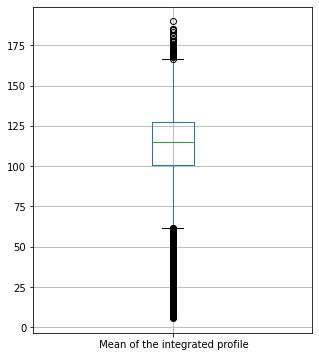

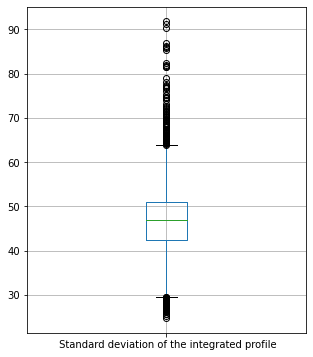

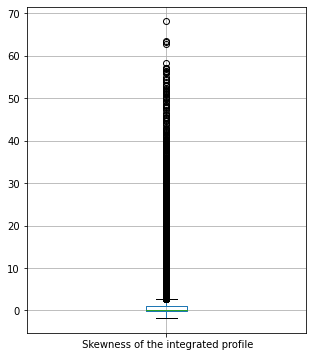

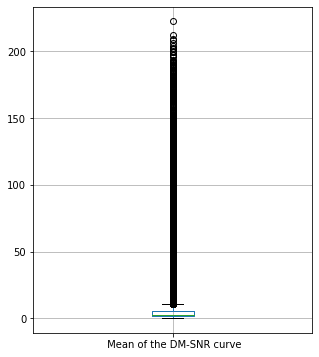

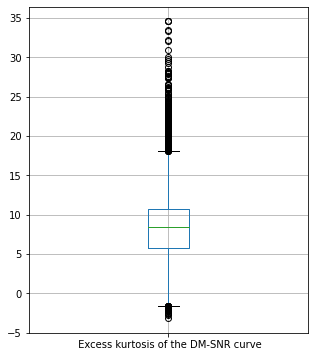

In [8]:
for column in X:
    plt.figure(figsize=(5,6))
    X.boxplot([column])

In [9]:
X=MinMaxScaler().fit_transform(X)
X

array([[0.62713448, 0.35206043, 0.02544901, 0.01330142, 0.28103484],
       [0.38688302, 0.17010882, 0.0741214 , 0.00983967, 0.33317986],
       [0.67840455, 0.42450688, 0.02138459, 0.01138617, 0.30912705],
       ...,
       [0.59926939, 0.27510059, 0.03183377, 0.00257374, 0.53595964],
       [0.70601478, 0.37534292, 0.02239349, 0.01640948, 0.27966859],
       [0.62479823, 0.38337595, 0.02828136, 0.00250225, 0.55206955]])

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [11]:
SVM_random = svm.SVC(C=1, gamma='auto', kernel='rbf')
SVM_random.fit(X_train, Y_train)
Y_pred = SVM_random.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy)
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion: ",confusion)

Accuracy:  0.9724660814046289
Confusion:  [[2273    4]
 [  65  164]]


In [12]:
SVM_random = svm.SVC(C=100,gamma='auto', kernel='rbf')
SVM_random.fit(X_train, Y_train)
Y_pred = SVM_random.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy)
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion: ",confusion)

Accuracy:  0.9780526735833999
Confusion:  [[2269    8]
 [  47  182]]


In [13]:
SVM_random = svm.SVC(C=1000,gamma='auto', kernel='rbf')
SVM_random.fit(X_train, Y_train)
Y_pred = SVM_random.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy)
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion: ",confusion)

Accuracy:  0.9808459696727854
Confusion:  [[2269    8]
 [  40  189]]


In [14]:
SVM_random = svm.SVC(C=1,gamma='auto', kernel='linear')
SVM_random.fit(X_train, Y_train)
Y_pred = SVM_random.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy)
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion: ",confusion)

Accuracy:  0.9736632083000798
Confusion:  [[2271    6]
 [  60  169]]


In [15]:
SVM_random = svm.SVC(C=100,gamma='auto', kernel='linear')
SVM_random.fit(X_train, Y_train)
Y_pred = SVM_random.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy)
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion: ",confusion)

Accuracy:  0.9788507581803672
Confusion:  [[2274    3]
 [  50  179]]


In [16]:
SVM_random = svm.SVC(C=1000,gamma='auto', kernel='linear')
SVM_random.fit(X_train, Y_train)
Y_pred = SVM_random.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy)
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion: ",confusion)

Accuracy:  0.9788507581803672
Confusion:  [[2274    3]
 [  50  179]]


In [17]:
SVM_random = svm.SVC(C=100,gamma=100, kernel='rbf')
SVM_random.fit(X_train, Y_train)
Y_pred = SVM_random.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy)
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion: ",confusion)

Accuracy:  0.9772545889864326
Confusion:  [[2260   17]
 [  40  189]]


In [18]:
SVM_random = svm.SVC(C=100,gamma=100, kernel='linear')
SVM_random.fit(X_train, Y_train)
Y_pred = SVM_random.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy)
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion: ",confusion)

Accuracy:  0.9788507581803672
Confusion:  [[2274    3]
 [  50  179]]


In [19]:
SVM_random = svm.SVC(C=1000,gamma=1000, kernel='rbf')
SVM_random.fit(X_train, Y_train)
Y_pred = SVM_random.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy)
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion: ",confusion)

Accuracy:  0.9381484437350359
Confusion:  [[2231   46]
 [ 109  120]]


In [20]:
SVM_random = svm.SVC(C=1000,gamma=1000, kernel='linear')
SVM_random.fit(X_train, Y_train)
Y_pred = SVM_random.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy)
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion: ",confusion)

Accuracy:  0.9788507581803672
Confusion:  [[2274    3]
 [  50  179]]
